## Entering the original data

In [38]:
import pandas as pd
from numpy import genfromtxt
data = genfromtxt('data.csv', delimiter=',')
data


array([2.52578   , 1.64818   , 3.53614   , 3.77024   , 3.03878   ,
       2.17282   , 3.61704   , 1.14447   , 3.22504   , 0.898248  ,
       0.425971  , 0.220322  , 0.99176   , 2.77482   , 0.297059  ,
       3.29275   , 1.17992   , 0.0548968 , 0.372537  , 3.32095   ,
       1.36388   , 0.660026  , 0.600339  , 1.96118   , 3.47192   ,
       1.17839   , 1.97627   , 1.74194   , 0.601494  , 2.23655   ,
       3.69288   , 2.31801   , 0.595496  , 1.20761   , 3.08054   ,
       0.620748  , 0.331684  , 0.236588  , 0.11068   , 2.6934    ,
       1.28877   , 1.44165   , 2.79394   , 0.673241  , 2.33422   ,
       3.84081   , 0.947063  , 1.40017   , 0.00884063, 1.05224   ,
       3.17933   , 1.62493   , 3.83161   , 1.55869   , 0.781226  ,
       3.86125   , 2.70444   , 2.73085   , 0.702521  , 0.0626176 ,
       0.902688  , 2.35209   , 1.06757   , 3.17446   , 2.17714   ,
       2.22161   , 2.03021   , 2.15154   , 3.32825   , 0.933814  ,
       1.11447   , 2.11497   , 1.88246   , 2.85753   , 1.10277

## Computing Pearson CLassification Factor

_Note: The moments here are not standardized, I have computed them as they were defined in my course. For general moment analyses, use standardized forms._

In [24]:
from scipy.stats import moment

n_data = len(data)

moments = [moment(data, i) for i in range(1,5)]
B1 = (moments[2]*(n_data)/(n_data - 1))**2/(moments[1]*(n_data)/(n_data-1))**3
B2 = (moments[3]*(n_data)/(n_data - 1))/(moments[1]*(n_data)/(n_data - 1))**2
pcf = abs(6 + 3*B1 - 2*B2) 

print(f"Pearson Classification Factor: {pcf}")

Pearson Classification Factor: 2.6231084931283686


## Entering the Indices to be used in CLT

In [26]:
idx = pd.read_csv('rand_indices.csv', header=None)
idx = idx.rename(columns= lambda s:'C'+ str(s))
idx

,C0,C1,C2,C3,C4,C5,C6,C7,C8,C9
0,92,67,15,83,65,95,38,93,0,59
1,20,13,98,80,35,68,3,71,38,28
2,86,26,65,91,15,26,3,37,59,17
3,9,86,41,97,79,8,7,1,67,51
4,55,76,80,79,63,35,61,14,40,87
...,...,...,...,...,...,...,...,...,...,...
95,72,0,4,5,40,23,8,0,12,58
96,27,41,81,99,97,30,24,53,34,51
97,1,62,69,63,89,99,95,84,21,20
98,96,80,89,18,47,4,23,17,49,70


## Creating a Normal Sample Using Central Limit Theorem

We use CLT to get a normal sample as the Student's theorem can only be used while sampling from a normal dataset. 

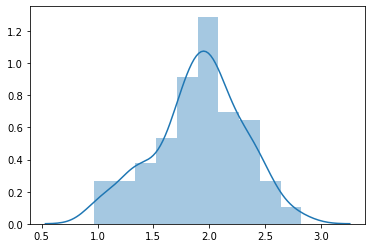

In [53]:
import numpy as np
import seaborn as sns
from scipy.stats import anderson
sample = []
for i in range(100):
    sample.append(np.sum(data[idx.iloc[i]])/len(idx.iloc[i]))
sns.distplot(sample)

## Anderson-Darling Test for Normality

In [56]:
stat, cv, sigs = anderson(sample)
if stat < cv[2]: # For significance level of 0.05
    print("Sampled distribution is normal")
else:
    print("Sampled distribution is NOT normal")

Sampled distribution is normal


## Finding Mean and Variance Ranges using Student's t Theorem



In [77]:
from scipy.stats import t, chi2

alpha = 0.01
n_samp = len(sample)
dof = n_samp - 1
pop_mean = np.mean(data)
pop_var = np.var(data)

print(f"Population Mean: {pop_mean}")
print(f"Population Variance: {pop_var}")

tv = t.ppf(1-alpha/2, dof)

samp_mean = np.mean(sample)
samp_std = np.std(sample, ddof=1)
samp_var = np.var(sample, ddof=1)

mean_range = (samp_mean - tv*samp_std/np.sqrt(n_samp), samp_mean + tv*samp_std/np.sqrt(n_samp))
var_range = ((n_samp - 1)*samp_var*10/chi2.ppf(1-alpha/2, dof), (n_samp - 1)*samp_var*10/chi2.ppf(alpha/2, dof))

print(f"Mean range: {mean_range}")
print(f"Var range: {var_range}")


Population Mean: 1.9486206603000003
Population Variance: 1.3866697777345505
Mean range: (1.8029802135983015, 2.0109182567616983)
Var range: (1.1162103891316917, 2.3325551949755052)
